# Task 1: Linear Models for Regression

**Initial steps**:

1. mount Google Drive


2. upload the `soybean_tabular.csv` to Google Drive


3. create a folder named `data`


4. copy the `soybean_tabular.csv` file to our working directory. Run the following code:

    !cp path_to_CSV 'data/'

where we replace `path_to_CSV` with the location of the `soybean_tabular.csv` (as a string) on our Google Drive.

*Alternatively, we can directly upload the CSV file to the working directory, placing it inside `data` folder.*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp '/content/drive/MyDrive/Colab Notebooks/Assessment_1/data/soybean_tabular.csv' 'data/'

## Subtask a. Data Import

### Importing the Soybean Crop Yield Data

Let's first import the `numpy` and `pandas` modules. 

In [5]:
# Import NumPy and Pandas packages
import numpy as np
import pandas as pd

We adopt the `pandas` Python package to read the `soybean_tabular.csv` comma-separated values (csv) dataset file into DataFrames. Specifically, we use the `read_csv` functions of the package to carry out the task.

In [6]:
# 'Read' the CSV dataset file contents into a Pandas data frame structure
soybean_df = pd.read_csv('data/soybean_tabular.csv')

### Describing the Imported Data

We employ the `DataFrame.describe()` method of the `pandas` library to display some basic statistical details like percentile, mean, std etc. of our data frame.

In [7]:
# Show a description of the imported 'soybean_tabular.csv' dataset
soybean_df.describe()

,Variety,S_1,S_2,S_3,S_4,M_1,M_2,M_3,W_1,W_2,W_3,W_4,Yield
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,9.549407,3.795043,18.455534,356.674032,12.653063,3.613524,11.363636,6.284634,11.131488,0.551258,68.574901,408.252839,22.532806
std,8.707259,2.105710,2.164946,91.294864,7.141062,8.601545,23.322453,0.702617,6.868654,0.181693,28.148861,168.530578,9.197104
min,1.000000,1.129600,12.600000,0.320000,1.730000,0.006320,0.000000,3.561000,0.472905,0.103660,2.900000,186.765075,5.000000
25%,4.000000,2.100175,17.400000,375.377500,6.950000,0.082045,0.000000,5.885500,5.149096,0.422286,45.025000,278.745884,17.025000
50%,5.000000,3.207450,19.050000,391.440000,11.360000,0.256510,0.000000,6.208500,9.588040,0.528133,77.500000,330.467783,21.200000
75%,24.000000,5.188425,20.200000,396.225000,16.955000,3.677082,12.500000,6.623500,18.094315,0.668573,94.075000,665.354401,25.000000
max,24.000000,12.126500,22.000000,396.900000,37.970000,88.976200,100.000000,8.780000,28.074197,1.158538,100.000000,711.210992,50.000000


We notice that  the dataset is comprised of 506 records, where each record contains 12 features and the average crop yield which is our target variable. Also, it is obvious that the feature value ranges are different for each feature. Hence, we will need to perform some data scaling on the provided data which is detailed in the sections below.

We also show some additionaly information about our dataset as follows.

In [8]:
# Show dataset data types and memory consumption
soybean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Variety  506 non-null    int64  
 1   S_1      506 non-null    float64
 2   S_2      506 non-null    float64
 3   S_3      506 non-null    float64
 4   S_4      506 non-null    float64
 5   M_1      506 non-null    float64
 6   M_2      506 non-null    float64
 7   M_3      506 non-null    float64
 8   W_1      506 non-null    float64
 9   W_2      506 non-null    float64
 10  W_3      506 non-null    float64
 11  W_4      506 non-null    float64
 12  Yield    506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


### Checking for Missing Values

We also need to check if there are any missing (`NaN`) values in the `soybean_tabular.csv` dataset. This can be evaluated via the `isnull()` or `isna()` functions of the `pandas.DataFrame` structure as shown below.

In [9]:
# Check the whole dataset for null values
soybean_df.isnull().values.any()

False

In [10]:
# Check for null values another way
soybean_df.isna().sum()

Variety    0
S_1        0
S_2        0
S_3        0
S_4        0
M_1        0
M_2        0
M_3        0
W_1        0
W_2        0
W_3        0
W_4        0
Yield      0
dtype: int64

We want to avoid missing values because if a dataset is full of `NaN` (junk) values, then the trained model will surely show a poor performance. So taking care of such missing values is indeed an important preprocessing step.

One solution if such values occur in the `DataFrame` is to fill in missing values spaces with the mean (average) of that column. However, above we can see that we have no missing values in our dataset. Therefore, it is not necessary to perform any adjustments.

## Subtask b. Data Pre-Processing

### Handling Categorical Data

There are no categorical (which can be divided into groups and/or in text format) variables present in our dataset. Hence, no modifications are required to the dataset considering handling such data.

### Separating Features and Labels (Targets)

The objective of Task 1 is to analyse a large
dataset of tabular modality concerning average crop yield prediction. The goal is to use these historical readings and their associated average yield to train a regression model to infer average yield from
future readings. 

So far we have imported and described the dataset which includes the average yield and 12 features. However, these are all in a single dataset that was `read` into a one `pandas.DataFrame` structure. In order to train our regression model with the given data we will need to divide it into features and labels data. 

To achieve this, we need to separate the `Yield` data column, our label (target) data series, from the remaining 12 feature columns. These are defined as follows:

- `Variety`: Crop seed variety.
- 4x Soil Components: {`S_1, S_2, S_3, S_4`}
- 3x Crop Management: {`M_1, M_2, M_3`}
- 4x Weather Components: {`W_1, W_2, W_3, W_4`}


For this we are going to make use of the `DataFrame.iloc[rows, columns]` method offered by the `pandas` library. 

In [11]:
# Divide the dataset into features and labels
X, y = soybean_df.iloc[:,:-1], soybean_df.iloc[:,-1]

Here `:` stands for all the rows and `-1` stands for the last column so the `X` is all the rows and all columns except the last one (`Yield`) where as with `y` it is vice-versa. 

In [12]:
# Show the features data frame
X

,Variety,S_1,S_2,S_3,S_4,M_1,M_2,M_3,W_1,W_2,W_3,W_4
0,1,4.0900,15.3,396.90,4.98,0.00632,18.0,6.575,2.381979,0.475522,65.2,296.350195
1,2,4.9671,17.8,396.90,9.14,0.02731,0.0,6.421,7.071148,0.509165,78.9,241.620198
2,2,4.9671,17.8,392.83,4.03,0.02729,0.0,7.185,6.896941,0.580673,61.1,241.551476
3,3,6.0622,18.7,394.63,2.94,0.03237,0.0,6.998,2.237817,0.491539,45.8,222.023994
4,3,6.0622,18.7,396.90,5.33,0.06905,0.0,7.147,1.979327,0.103660,54.2,221.723972
...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,2.4786,21.0,391.99,9.67,0.06263,0.0,6.593,11.774062,0.565469,69.1,272.952382
502,1,2.2875,21.0,396.90,9.08,0.04527,0.0,6.120,11.785249,0.562102,76.7,273.264306
503,1,2.1675,21.0,396.90,5.64,0.06076,0.0,6.976,11.854205,0.777569,91.0,273.421726
504,1,2.3889,21.0,393.45,6.48,0.10959,0.0,6.794,11.765196,0.679057,89.3,273.913622


In the above two examples, the output for `y` was a `Series` and not a `DataFrame`. Thus, we use the `Series.to_frame()` method to convert it. This has no actual influence on our future results and the sole purpose of executing the conversion is for visualisation purposes of the labels data. That is, a single column `DataFrame` can have a name for its single column but a `Series` cannot have a column name.

In [13]:
# Convert the labels series to a data frame structure and show
# the contents of the labels data frame
y.to_frame()

,Yield
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### Feature Scaling

Machine learning algorithms which employ gradient descent as an optimization technique require data to be scaled. For instance, such algorithms are linear and logistic regression, neural networks, etc. 

We show the gradient descent formula below:

<img src="https://drive.google.com/uc?id=1rFjsu4p9Sctf6GjGc1l4toftJfFG_SmG">

The `X` feature (input) variable in the formula affects the gradient descent step size. Hence, the variation in feature ranges will result in distinct step sizes for each feature. We scale the data before feeding it to the model to guarantee that the gradient descent progresses smoothly towards the minima. That is, by scaling our feature values we ensure that the gradient descent steps will be updated at the same rate for all features. 

In other words, since we will be using gradient descent based algorithms (`Ridge` and `Lasso` Regression), having features of comparable scale can aid in the gradient descent's quick convergence to the minima. In the following parts we discuss our choice between the normalisation and standardisation scaling techniques.

In general, the min-max normalisation produces lower standard deviation values as opposed to the standardisation method. After applying the min-max scaling technique, all features will have a minimum value of 0 and a maximum value of 1. Particularly, normalising the data scales most of the data to a small interval. However, if any outliers are present in our features (columns) they will not be handled well. This means that this technique is really affected by outliers.

On the other hand, standardisation is not bounded to a certain range making it more robust to outliers. Thus, it is often prefered over the min-max normalisation. 

Therefore, we pick our scaling method to be standardisation due to the reasons mentioned above. The standardisation procedure will be carried out on the go since we create a `pipeline` for the cross-validating process of our two models. This is all described in the next section.


### Combining Hyperparameter Tuning and Model Selection

Here, we use the so called **nested cross-validation** procedure. It allows us to perform cross-validation when selecting among models while simultaneously tuning their hyperparameters for best performance. The nested cross-validation significantly reduces the bias in tuned model performance on the dataset.

For the nested cross-validation, we use a k-fold cross-validation outer loop together with a k-fold cross-validation inner loop. The outer loop splits the data into training and test folds whereas the inner is used to select the most optimal model (hyperparameter tuning) using the training and validation folds. Below is a diagram representing a nested 5x2 cross-validation technique:

![FIGURE CAPTION](https://drive.google.com/uc?id=1ZpRH1D9LbntEoazh60R70k3ReyywCQnM)
<br>
<center><b>Fig 1.</b> Example nested 5x2 cross-validation.</center>

#### Importing libraries

- `time` - to keep track of the algorithm runtimes


- `sklearn.metrics.mean_squared_error` and `sklearn.metrics.mean_absolute_error` - the metric functions we are going to use for the model evaluations


- `scipy.stats.uniform` - to create a uniform value distribution in `[0,1]` for the `alpha` values of the regression models


- `sklearn.model_selection.KFold`- for creating k-fold cross-validation procedures. We seek a train, validation, test split of 70-15-15% (our reasoning is detailed later). Therefore, we use 7 splits for the outer loop to get folds of $\approx 14.29\%$ for the test set. Since we remain with a training set of 85%, we pick 6 splits for the inner loop to ensure that the validation set is also iterated over folds of $\approx 14.29\%$.


- `sklearn.model_selection.RandomizedSearchCV` - for hyperparameter search to detect the best-performing model


- `sklearn.model_selection.cross_val_score` - to evaluate the model performance on the validation set by cross-validation


- `sklearn.pipeline.Pipeline` - to create a pipeline of transforms with a final estimator (since we use the whole unscaled soybean dataset for the nested cross-validation procedure) 


- `sklearn.preprocessing.StandardScaler` class - for data standardisation which is added to the pipeline


- `sklearn.linear_model.Ridge` and `sklearn.linear_model.Lasso` - the Ridge and Lasso Regression classes. 


- `matplotlib.pyplot` - for data and results plotting. 

In [14]:
# Import various packages used in model training and evaluation below
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from scipy.stats import uniform, loguniform
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Ridge and Lasso Models Intro


- **Ridge Regression**: adds a penalty term which is equal to the square of the coefficient. The $\lambda$ coefficient is crucial in cotrolling the penalty. As we increase the value of $\lambda$ this constraint reduces the coefficients close to zero but never zeroes them. This results in low variance (since certain coefficients have a minor influence on prediction) and low bias (minimization of coefficient reduce the dependency of prediction on a particular variable). 
    <br>

    - One shortcoming of Ridge Regression is that it reduces model complexity but does not lower the number of variables. This is due to the fact that it never results in zero coefficient values, but rather just minimizes them. As a result, it is not a suitable model for feature selection. 


- **Lasso Regression**: stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function where the term is the absolute sum of the coefficients. The difference between Ridge and Lasso Regressions is that the latter tends to push the coefficients to absolute zero
    <br>
    
    - Lasso sometimes struggles with some types of data. If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for data interpretation.
    
#### Some visualisations 

First, we display how the $\lambda$ coefficient value influences our feature weights for the `Ridge` and `Lasso` models.

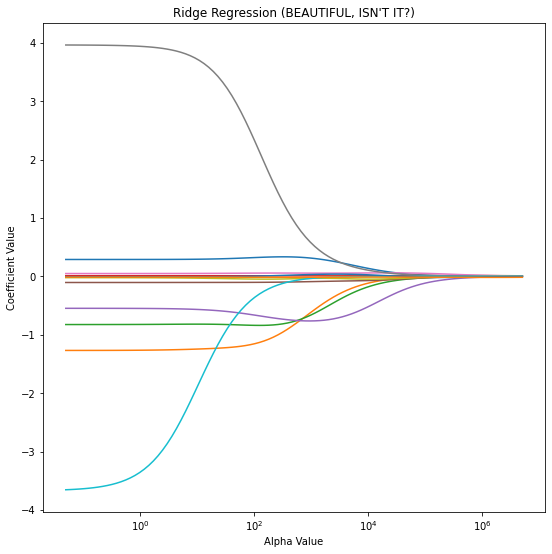

In [15]:
# Initialise the Ridge and Lasso Regression models
ridge_model = Ridge() 
lasso_model = Lasso()

# List to hold the models' feature coefficients
ridge_coeffs = []  
lasso_coeffs = [] 

# Lambda or alpha (Python) values to show how it affects 
# the shrinkage of the feature weights
lambda_values = 10**np.linspace(7, -1, 100)*0.5

# Train the models and extract the coefficients
for i in lambda_values:
    ridge_model.set_params(alpha = i)
    lasso_model.set_params(alpha = i)
    
    ridge_model.fit(X, y)
    lasso_model.fit(X, y)
    
    ridge_coeffs.append(ridge_model.coef_)
    lasso_coeffs.append(lasso_model.coef_)

# Display the Ridge Regression 'alpha' value influence plot
plt.figure(figsize=(9,9))
ax = plt.gca()
ax.plot(lambda_values, ridge_coeffs)
ax.set_ylabel('Coefficient Value')
ax.set_xlabel('Alpha Value')
ax.set_title("Ridge Regression (BEAUTIFUL, ISN'T IT?)")
ax.set_xscale("log")

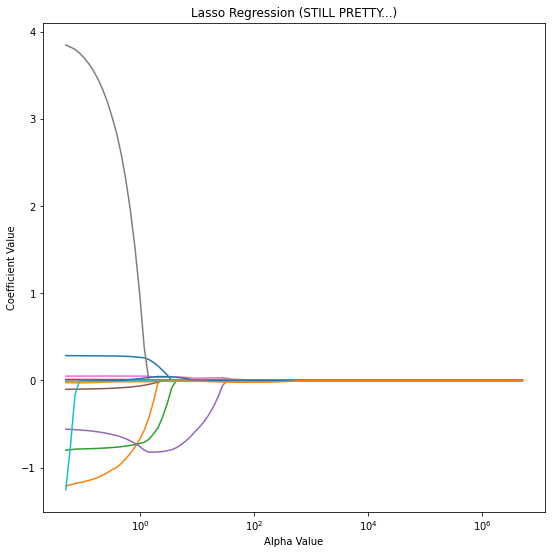

In [16]:
# Plot the Lasso Regression coefficient change
# regarding the 'alpha' hyperparameter
plt.figure(figsize=(9,9))
ax = plt.gca()
ax.plot(lambda_values, lasso_coeffs) 
ax.set_ylabel('Coefficient Value')
ax.set_xlabel('Alpha Value')
ax.set_title('Lasso Regression (STILL PRETTY...)')
ax.set_xscale("log")

We can see that the higher the `alpha` value, the greater the shrinkage of the feature coefficients. Also, the `Lasso` model coefficients converge earlier than those of the `Ridge` Regression.

#### Performing the Nested Cross-Validation

Below, we create a dictionary that holds the name of the regression models as keys and their corresponding model classes as values.

The hyperparameter for both `Lasso` and `Ridge` regression models that we are going to tune is the `lambda` or `alpha` (Python) argument when defining the class. The default value is 1.0 or a full penalty (`Lasso`) whereas a value of 0.0 excludes the penalty. Mainly, the complexity of these regression models decreases as we increase `alpha`. Although larger `alpha` values (e.g., `alpha` = 5) minimise overfitting, they can also induce underfitting. As a result, alpha should be chosen with caution. Therefore, we define our parameter value search space in the `[0,1]` range to avoid high variance and bias of our models.



In [17]:
# Define a dictionary of the linear regression models
regression_models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
}

# Define the parameter search space
space = dict()
space['reg_model__alpha'] = uniform()

Next, we define a `DataFrame` structure to hold the results we obtain from the nested cross-validation procedures. We also create the inner and outer k-fold cross-validation procedures. 

In [18]:
# Create a data frame to store the nested CV results
df_models = pd.DataFrame(columns=['Regressor', 'Runtime', \
                                  'Cross-Validation RMSE'])

# Create the inner k-fold cross-valudation procedure 
# of the nested cross-validation
cv_inner = KFold(n_splits=6, shuffle=True, random_state=1337)

# Configure the outer k-fold cross-valudation procedure 
# of the nested cross-validation
cv_outer = KFold(n_splits=7, shuffle=True, random_state=1337)

Finally, we initialise a for-loop where we:

- define our pipeline for the current model


- start the runtime timer


- define the randomised search for hyperparameter tuning in the inner cross-validation loop


- plug in the `RandomizedSearchCV` instance into the `cross_validation_score` which automates the nested cross-validation procedure. Notice that we use the whole dataset (together with the test set). This is because we want to evaluate the models over all possible dataset split combinations and pick the best-performing model by averaging all results.


- store the cross-validation result into our dataframe. 

*Here, we do not care about the particular configuration of the possible models since we evaluate overall model performance over all possible dataset splits. That is, for a particular train test split we will need to execute a new `RandomizedSearchCV` procedure.*

We use the Root Mean Squared Error (`RMSE`) metric which is the most widely used metric for regression tasks. It is the square root of the averaged squared difference between the target value and the value predicted by the model. Moreover, an advantage of `RMSE` is that it provides a proper performance reflection when dealing with large error values (i.e penalizes really bad predictions).

Finally, we display the contents of the updated `pandas.DataFrame` structure (`df_models`).

In [19]:
# Initialise the nested CV for-loop
for name, reg_model in regression_models.items():

    print(f'Current model: {name}')
    
    # Create a pipeline with the scaler and model.
    steps = [('scaler', StandardScaler()), ('reg_model', reg_model)]
    pipeline = Pipeline(steps)
    
    # Start the timer to calculate the runtime.
    start_time = time.time()

    # Define the randomised search.
    search = RandomizedSearchCV(pipeline, space, \
                                scoring='neg_root_mean_squared_error',\
                                n_jobs=-1, cv=cv_inner, n_iter=40, \
                                refit=True, random_state=1337)
    
    # Run the cross-validation procedure and get the results.
    scores = cross_val_score(search, 
                             X, 
                             y,
                             scoring="neg_root_mean_squared_error", 
                             cv=cv_outer,
                             verbose=0)

    # Create the data frame row with the cross-validation
    # scores for the current model.
    row = {'Regressor': reg_model,
           'Runtime': format(round((time.time() - start_time)/60, 5)),
           'Cross-Validation RMSE': round(np.mean(-scores),4)
    }
    
    # Add the row to the data frame.
    df_models = df_models.append(row, ignore_index=True)

# Sort the data frame contents by cross-validation RMSE score.
df_models.sort_values(by='Cross-Validation RMSE', ascending=True)

Current model: Ridge
Current model: Lasso


,Regressor,Runtime,Cross-Validation RMSE
0,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.18597,4.9362
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.15758,4.9366


On the dataframe shown above we observe that the Ridge Regression model outperforms the Lasso Regression model only marginally on the nested cross-validation procedure. 

Normally, the Lasso Regression model is preferred when the dataset contains a lot of features and we need a simpler and more interpretable model. That is, when the features have low correlation. In contrast, the Ridge Regression performs well on dataset with high feature correlation. This is because it trades bias for variance reduction. Thus, we can infer that our dataset contains highly correlated features thus the cross-validated `Ridge` models perform better overall.

A correlation heatmap is provided below which shows that our inference about highly-correlated features holds.

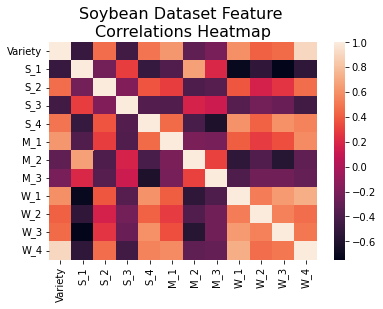

In [20]:
# Import the 'seaborn' library
import seaborn as sns

# Display the feature correlations as a heatmap
ax = plt.axes()
ax.set_title('Soybean Dataset Feature \nCorrelations Heatmap', fontsize = 16)
sns.heatmap(X.corr(), ax = ax)
plt.show()

Considering the observations above, we decide that our final model will be the Ridge Regression. We can now use it to make predictions on new data and evaluate its generalisation capability.

*Note: We also evaluated both models using different metrics (i.e. `MSE`) and the result was the same.*

## Subtask d. Inference


### Train Validation Test Split

Here, we are taking the training set to be 70% of the original dataset and the validation and testing sets to be 15% each. This is usually the ratio in which they are split. There are various split ratios one can come across such as 80–10-10% or 60–20-20% etc. Nevertheless, we should never split our dataset 33–33-33% since this may lead to model overfitting.

To achieve the splitting, we employ the `model_selection.train_test_split()` function of the `sklearn` library.

In [21]:
# Import the data splitting function from 'sklearn' 
from sklearn.model_selection import train_test_split

# Split the data to train and test sets using a 85:15 ratio
X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.15, random_state=1337)

# Create a StandardScaler instance used in standardising our data
sc = StandardScaler()

# Fit only to the train data since we do not want data leakage 
# from the test set. Then we transform both the train and test sets.
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Notice here that we only split the dataset once - into train and test sets. This is because we employ a randomised search on hyperparameter for the Ridge Regression via `model_selection.RandomizedSearchCV` class of the `sklearn` package. `RandomizedSearchCV` performs a cross-validated search over the parameter settings provided. Hence, the cross validation will split the data into folds and during the procedure a different fold acts as our validation set. 

To determine the size of the validation we need to choose the right cross-validation splitting. For this we use the `cv` parameter of the `RandomizedSearchCV` class. Since we will be cross-validating only the training part of our dataset which is 85% of the whole data, we set `cv` to a K-Folds cross-validator with 6 splits. This gives us a validation set of size $\frac{85}{6} \approx 14.17\%$ at each iteration which is roughly the percentage we are looking for.

### Evaluating the `Ridge()` model

First, we fit the the `Ridge()` model to the data using its default parameters and print the predictions values. 

In [22]:
# Initialise the default Ridge model
ridge_def = Ridge()

# Fit the default model on the whole training data
ridge_def.fit(X_train_scaled, y_train)

# Make predictions on the holdout test data
y_pred_ridge_def = ridge_def.predict(X_test_scaled)

# Report the results using the various metrics of the sklearn library
print('Default Ridge Regression results:\n')
print(f'R2: {round(ridge_def.score(X_test_scaled, y_test),5)}')
print(f'RMSE: {round(mean_squared_error(y_test, y_pred_ridge_def, \
                                        squared=False),5)}')
print(f'MSE: {round(mean_squared_error(y_test, y_pred_ridge_def),5)}')
print(f'MAE: {round(mean_absolute_error(y_test, y_pred_ridge_def),5)}')

Default Ridge Regression results:

R2: 0.67286
RMSE: 4.94579
MSE: 24.46088
MAE: 3.25936


The obtained results are relatively good. Now, we proceed to the hyperparameter tuning process which should provide better results.

It comprise the following steps:

- define the `KFold` cross-validation procedure


- create a uniform distribution for the alpha parameter as earlier


- create a dictionary of scorer names and their corresponding `sklearn` functions


- define a data frame where we will reflect the model performance results


- run a for-loop for the different scoring metrics where we: <br>
    
    - execute the hyperparameter randomised search for the `Ridge` Regression models with the current scoring metric
    
    - make predictions using the obtained best model

    - store the results in the `pandas.DataFrame` structure created previously.
    


In [24]:
# Create the KFold cross-validation procedure
cv = KFold(n_splits=6, shuffle=True, random_state=1337)

# Define the uniform distribution in the [0,1] range as before
space = dict()
space['alpha'] = uniform()

scorers = {
    'R2': ['r2', None],
    'RMSE': ['neg_root_mean_squared_error', mean_squared_error],
    'MSE': ['neg_mean_squared_error', mean_squared_error],
    'MAE': ['neg_mean_absolute_error', mean_absolute_error]
}

# Define the results data frame
results_df = pd.DataFrame(columns=['Model', 'Scorer', 'Runtime', 
                                   'Cross-Validation Score', \
                                   'Prediction Score'])

# Dictionary to store all best model predictions
all_predictions = {}

# List to hold the hyperparameter search data (i.e. test and train scores etc.)
search_results = []

# List to hold the best model hyperparameter configurations
best_configs = []

for name, lst in scorers.items():
    
    # Get the scorer name and its function
    scorer, function = lst

    # Define the randomised search
    search = RandomizedSearchCV(Ridge(), space, scoring=scorer,\
                                n_jobs=-1, cv=cv, n_iter=25, \
                                refit=True, random_state=1337, \
                                verbose=3, return_train_score=True)

    # Start the timer to calculate the runtime
    start_time = time.time()

    # Execute the hyperparameter search
    result = search.fit(X_train_scaled, y_train)
    
    # Add the search data to the storage list
    search_results.append(search.cv_results_)
    best_configs.append(search.best_params_)
    
    # Extract the best-performing model results
    best_model = search.best_estimator_
    best_model_score = -result.best_score_
    
    # Make predictions using the best model
    y_pred = best_model.predict(X_test_scaled)
    
    # Store the prediction in a list for later use
    all_predictions[name] = y_pred
    
    # Summarise the search results
    if name == 'RMSE':
        func = function(y_test, y_pred, squared=False)
    elif name == 'R2':
        func = best_model.score(X_test_scaled, y_test)
        best_model_score = -best_model_score
    else:
        func = function(y_test, y_pred)
        
    # Create the data frame row with the cross-validation
    # scores for the current model.
    row = {
        'Model': best_model,
        'Scorer': name,
        'Runtime': format(round((time.time() - start_time)/60, 5)),
        'Cross-Validation Score': f'{best_model_score:.4f}',
        'Prediction Score': f'{func:.5f}'
    }
    
    # Add the row to the data frame.
    results_df = results_df.append(row, ignore_index=True)

Fitting 6 folds for each of 25 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 6 folds for each of 25 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 6 folds for each of 25 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 6 folds for each of 25 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.5s finished


We display the best Ridge Regression model results hereunder.

In [25]:
# Import the function for displaying HTML code
from IPython.display import display_html 

# Represent the data frame used for storing the nested CV results
# as HTML code
html_1 = results_df.\
style.set_caption("Best Cross-Validated Ridge Regression Model Results").\
                    set_table_styles([{
                        'selector': 'caption',
                        'props': [
                            ("text-align", "center"),
                            ('font-size', '150%'),
                            ("color", 'black'),
                            ('font-weight', 'bold')
                        ]},{
                        'selector': 'th',
                        'props': [
                            ("text-align", "center"),
                        ]}])._repr_html_()

# Display the HTML-formatted results data frame
display_html(html_1, raw=True)

,Model,Scorer,Runtime,Cross-Validation Score,Prediction Score
0,"Ridge(alpha=0.9835486051436412, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001)",R2,0.00707,0.6923,0.67287
1,"Ridge(alpha=0.9835486051436412, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001)",RMSE,0.0084,4.9954,4.94571
2,"Ridge(alpha=0.9835486051436412, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001)",MSE,0.00875,25.6411,24.46009
3,"Ridge(alpha=0.9835486051436412, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001)",MAE,0.00786,3.4555,3.25937


#### Rebuilding our `Ridge` Model with the Best Hyperparameter Values

Now, we reconstruct the `Ridge` regressor with the best hyperparameter configuration obtained previously. Then we fit the model on the whole training set and make predictions on the test set reporting the model `R2`, `RMSE`, `MSE` and `MAE` results. 

In [26]:
# Get the best hyperparameter  
ridge_best_alpha = best_configs[1].get('alpha')

# Rebuild the model with the best hyperparameter 
# values to obtain our best model (unfitted)
ridge_best = Ridge(alpha=ridge_best_alpha)


# Train the best Ridge regression model on the whole training data
ridge_best.fit(X_train_scaled, y_train)

# Make prediction on the holdout test set
y_pred_ridge_best = ridge_best.predict(X_test_scaled)

# Report the results
print('Best Ridge Regression results:\n')
print(f'R2: {round(ridge_best.score(X_test_scaled, y_test), 5)}')
print(f'RMSE: {round(mean_squared_error(y_test, y_pred_ridge_best, \
                                        squared=False),5)}')
print(f'MSE: {round(mean_squared_error(y_test, y_pred_ridge_best), 5)}')
print(f'MAE: {round(mean_absolute_error(y_test, y_pred_ridge_best), 5)}')

Best Ridge Regression results:

R2: 0.67287
RMSE: 4.94571
MSE: 24.46009
MAE: 3.25937


The results above indicate a drop of $\approx 0.002\%$ compared to the default `Ridge()` model `RMSE` result. Also, the model shows a prediction score which is with $\approx 1.00\%$ lower than the cross-validation score. 

Altogether, the hyperparameter tuning helped boost our model performance to a negligible extent and in our case it is not really worth the effort. This might be caused by the fact that we use a small range of values for the hyperparameter search. Nevertheless, using values greater than 1 for the `alpha` parameter could lead to a highly biased model which we are trying to avoid.

### Model Plots

#### Validation Curve

Here, we adopt the mean train and test scores taking into account all models explored by the `RandomizedSearchCV` with the `r2` metric. Having in mind that the `alpha` value range was only between `[0,1]`,  the fluctuations of both training and test error lines are, therefore, almost non-existent.

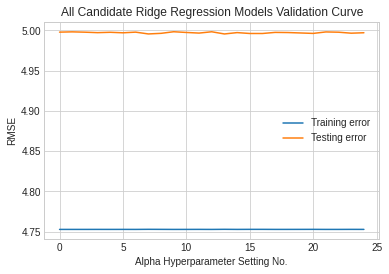

In [31]:
# Plot the validation curve for all the candidate models (RMSE scoring) tested
# by the cross-validation procedure above. We consider the mean values here.
plt.plot(abs(search_results[1]['mean_train_score']), label="Training error")
plt.plot(abs(search_results[1]['mean_test_score']), label="Testing error")
plt.legend()
plt.style.use('seaborn')
plt.xlabel("Alpha Hyperparameter Setting No.")
plt.ylabel("RMSE")
plt.title("All Candidate Ridge Regression Models Validation Curve")
plt.show()

#### Measured vs Predicted `Yield` Value Plots

The following plot shows that our best model fit line (identity) is acceptably close to the best fit line of the problem domain.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


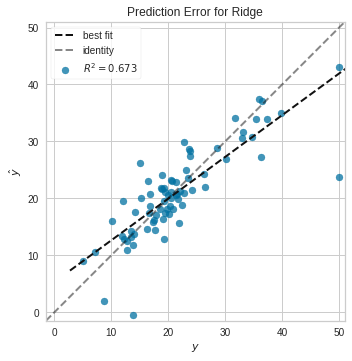

In [32]:
# Import yellowbrick library visualisation classes
from yellowbrick.regressor import PredictionError, AlphaSelection
from yellowbrick.model_selection import LearningCurve, ValidationCurve

# Create a prediction error visualisation instance 
# for our best ridge model
visualizer = PredictionError(ridge_best)

# Fit the best model all over again so we can
# record the errors for visualisation
visualizer.fit(X_train_scaled, y_train)

# Record the score of the best Ridge model on
# the holdout test set
visualizer.score(X_test_scaled, y_test)

# Finalise and render the prediction error visualisation
visualizer.finalize()

#### Learning Curve

The learning curve below shows that the model starts overfitting after around 260 of training instances. Hence, our best model does not demand additional training data. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


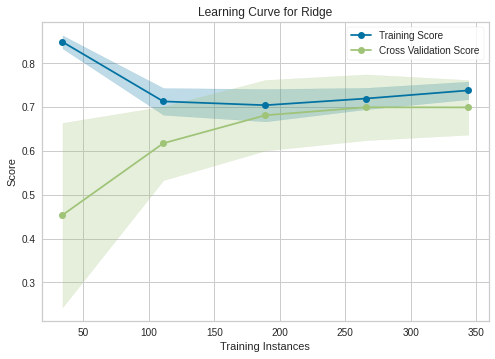

In [33]:
# Instantiate the LearningCurve object for our model
# which we use to visualise the training and test scores
# after training the model
visualizer = LearningCurve(ridge_best, scoring='r2')

# Fit the data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Finalise and render the figure
visualizer.finalize()          

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


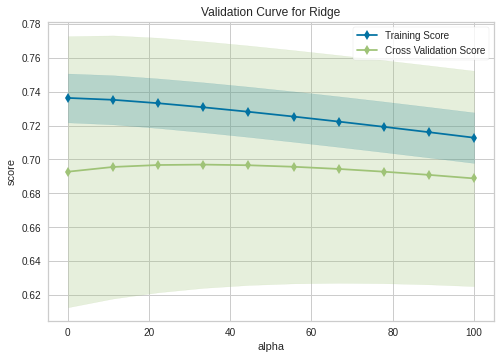

In [34]:
# Instantiate the ValidationCurve object
# adopted for visualising the cross-validation 
# curve of the best Ridge Regression model
viz = ValidationCurve(
    ridge_best, param_name="alpha",
    param_range=np.linspace(0.1,100,10), cv=6, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X_train_scaled, y_train)
viz.finalize()

From the above plot we can tell that probably a better alpha value in our case would be around 30. However, this would lead to a high bias in our model results.

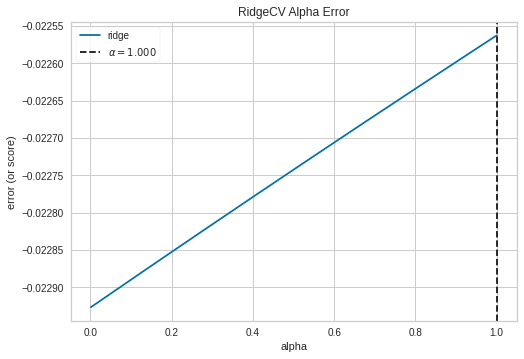

In [35]:
# Import the Ridge model dedicated CV function
# used in displaying the RMSE with regards to the 'alpha' hyperparameter
from sklearn.linear_model import RidgeCV

# Visualise the RMSE considering different 'alpha' values of the Ridge model
search = RidgeCV(alphas=np.linspace(0.001, 1, 1000), \
                 scoring='neg_root_mean_squared_error')
visualizer = AlphaSelection(search)
visualizer.fit(X_train_scaled, y_train)
visualizer.finalize()

We observe that the `Ridge` regression model is decreased as the `alpha` value goes to 1.

## Subtask e. Feature Importance

Generalised linear models are fit by modifying the coefficients so as to minimise error. The regularisation techniques specify how the model modifies coefficients in relation to each other. Consequently, larger coefficients are necessarily 'more informative' because they contribute a greater weight to the final prediction in most cases. Generally, positive coefficients make the event more likely and negative coefficients make the event less likely. An estimated coefficient near 0 implies that the effect of the predictor is small. 

We explore the feature importance of our soybean dataset below according to our best `Ridge()` model. Since regression model coefficients may be negative (indicating a strong negative correlation) we must rank features by the absolute values of their coefficients. Our feature values are scaled, therefore, can directly compare the feature importance values. 

First, we display the feature importance results in a table form, as shown below.

In [36]:
# Place the feature importance (coefficient) values in a `pandas.DataFrame` 
# structure and sort them in descending order to see the top coefficient values. 
feature_importance = pd.DataFrame({'Feature': X_train.columns, \
                                   'Importance Score':\
                                   [abs(i) for i in ridge_best.coef_]})
feature_importance.sort_values('Importance Score', ascending=False)

,Feature,Importance Score
4,S_4,3.857935
7,M_3,3.090439
1,S_1,2.437846
0,Variety,1.986255
11,W_4,1.889514
2,S_2,1.849362
3,S_3,0.970909
6,M_2,0.810323
9,W_2,0.774225
5,M_1,0.745904


On the other hand, visualizing feature importances of a model is usually done via bar chart. The bar chart y-axis is the feature names while the x-axis represents the numerical values of the coefficient such that the x-axis has both a positive and negative quadrant. The bigger the size of the bar, the more informative that feature is. 

The following plot shows the feature importances of the soybean dataset according to our final best-performing `Ridge()` Regression model in a bar chart form.

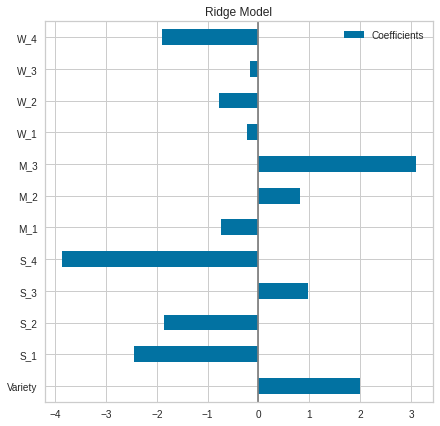

In [37]:
# Create a new best Ridge model data frame containing
# the feature importance values
coefs = pd.DataFrame(
   ridge_best.coef_,
   columns=['Coefficients'], index=pd.DataFrame(X_train).columns
)

# Plot the coefficients for observation and analysis
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

The above illustrations show us that the most important feature in our soybean dataset is the `S_4` feature or the fourth soil component followed by `M_3`, `S_1`, `Variety` and `W_4`. When we consider many features, each feature coefficient is impacted by the coefficient of the others in a machine learning model. The least impactful features are the `W_3` and `W_1` which is reasonable. That is, people use so called windbreaks (shelterbelts) to protect the plants (might hold in our case) from the wind and the soil from erosion. Hence, this way the impact of the weather on the crop yield is lessened. In our case, we might omit these features without significantly impacting our models prediction accuracy. However, this might not apply for other real-world datasets out there.

It is apparent that the other feature importances (coefficients) of the dataset are minimised to some extent but they are still influencing the final prediction of the model. Hence, we conclude that when making a crop yield prediction we need as much information as possible (mainly about the soil, variety and management components) to increase the probability of correctly predicting the yield value.